In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/pyPhysChem


**Start at:** Wednesday 05 April 2023, 12:30:30  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# Particle in a box (infinite square well)

## **1.** 1D quantum particle in a box

### **1.1.** Check that the wavefunctions found in textbooks are actual solutions of the Schrödinger equation

$$-\frac{\hbar^{2}}{2m}\frac{d^{2}\psi}{dx^{2}}+V(x)\psi(x)=E\psi(x)$$

with $V(x)=0$

$$\psi_{n}(x)=\sqrt{\frac{2}{L}}\sin\left(\frac{n\pi}{L}x\right)$$

$$E_{n}=\frac{n^{2}\pi^{2}\hbar^{2}}{2mL^{2}}$$

In [2]:
import sympy as sym
from tools4pyPhysChem import PrintLatexStyleSymPyEquation as ple

hbar, m, L = sym.symbols('hbar m L', positive=True)
n = sym.Symbol('n', positive=True, integer=True)
x = sym.Symbol('x', positive=True)

def T_hat(f):
    return -hbar**2 /(2*m) * f.diff(x, x)

def psi(n,L,x):
    return sym.sqrt(2/L)*sym.sin(n*sym.pi*x/L)

ple(psi(n,L,x))
    
ple(T_hat(psi(n,L,x)))

En = T_hat(psi(n,L,x)) / psi(n,L,x)
ple(En)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### **1.2.** Solve the Schrödinger equation with initial conditions in order to find $\psi$

In [3]:
hbar, m, L = sym.symbols('hbar m L', positive=True)
x = sym.Symbol('x', positive=True)
E = sym.Symbol('E', positive=True)
Psi = sym.Function('Psi')

def T_hat(f):
    return -hbar**2 /(2*m) * sym.Derivative(f(x), x, 2)

ple(sym.Derivative(Psi(x), x, 2))
ple(T_hat(Psi) / Psi(x))

expr = sym.Eq(T_hat(Psi) / Psi(x), E)
ple(expr)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
PsiSol = sym.dsolve(expr,ics={Psi(0): 0})
ple(PsiSol)
PsiSol = PsiSol.rhs
ple(PsiSol)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
PsiSol = sym.dsolve(expr,ics={Psi(0): 0, Psi(L) : 0})
ple(PsiSol)
PsiSol = PsiSol.rhs
ple(PsiSol)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
PsiSol0 = sym.dsolve(expr,ics={Psi(0): 0})
ple(PsiSol0)
PsiSol0 = PsiSol0.rhs
ple(PsiSol0)

PsiSolL = sym.dsolve(expr,ics={Psi(L): 0})
ple(PsiSolL)
PsiSolL = PsiSolL.rhs
ple(PsiSolL)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
expr2 = sym.Eq(PsiSol0, 0)
sym.solveset(expr2,x)

Union(ImageSet(Lambda(_n, sqrt(2)*hbar*(2*_n*pi + pi)/(2*sqrt(E)*sqrt(m))), Integers), ImageSet(Lambda(_n, sqrt(2)*_n*pi*hbar/(sqrt(E)*sqrt(m))), Integers))

In [26]:
expr3 = sym.Eq(PsiSolL, 0)
sym.solveset(expr3,x)

Union(ImageSet(Lambda(_n, sqrt(2)*hbar*(2*_n*pi + arg(exp(sqrt(2)*I*sqrt(E)*L*sqrt(m)/hbar)))/(2*sqrt(E)*sqrt(m))), Integers), ImageSet(Lambda(_n, sqrt(2)*hbar*(2*_n*pi + arg(-exp(sqrt(2)*I*sqrt(E)*L*sqrt(m)/hbar)))/(2*sqrt(E)*sqrt(m))), Integers))

In [16]:
expr4=sym.Eq(sym.sin(x),0)
sym.solveset(expr4,x)

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

In [45]:
expr5 = PsiSol0.subs(x,L)
ple(expr5)
expr5=sym.Eq(expr5,0)
sym.solveset(expr5,E)

<IPython.core.display.Math object>

ConditionSet(E, Eq(sin(sqrt(2)*sqrt(E)*L*sqrt(m)/hbar), 0), Complexes)

### **1.3.** Non symbolic approach

338.42714635506377
1.0000000000000002 1.1102230246251565e-14
638.5349668618666
approximate length of butadiene =  6.062177826491071e-10 m.   Number of pi electrons =  3.0
Box length =  7.274613391789285e-10
Transition wavelength =  436.2179176948364  nm
Transition wavelength =  206.7996054257002  nm


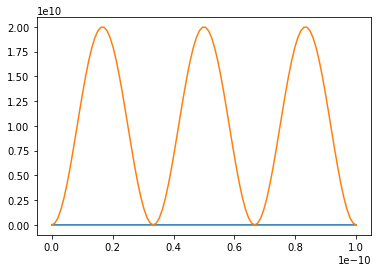

<Figure size 432x288 with 0 Axes>

In [164]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.constants import h, hbar, m_e, elementary_charge, c
from scipy.misc import derivative as df
from scipy.integrate import quad

%matplotlib inline

def psi(x, n, L):
    return np.sqrt(2/L) * np.sin(n*np.pi*x/L)

def psi2(x, n ,L):
    return psi(x,n,L)**2

def eps(n, L, m):
    """ returns energy in eV """
    return (n**2 * (hbar**2*(np.pi)**2) / (2 * m * L**2)) / elementary_charge

def Hpsi(f,x, n, L, m):
    """ returns energy in eV by calculating (H |Psi> / |Psi>)"""
    return -hbar**2/(2*m) * df(f,x,dx=0.1e-10,n=2,args=(n,L))/psi(x,n,L) / elementary_charge

def polymere_pi(nC):
    CC = 140e-12 #pm -> m
    L = (nC-1) * CC*np.sin(60*np.pi/180)
    BL = L + CC*np.sin(60*np.pi/180)
    npi = nC/2
    return BL, L, npi

def EHOBV(nC):
    """ returns energy in J """
    BL, L, npi = polymere_pi(nC)
    nHO = npi/2
    nBV = nHO + 1
    EHO = eps(nHO, BL, m_e) * elementary_charge
    EBV = eps(nBV, BL, m_e) * elementary_charge
    return EHO, EBV

def EHOBV_BL(BL, npi):
    """ returns energy in J """
    nHO = npi/2
    nBV = nHO + 1
    EHO = eps(nHO, BL, m_e) * elementary_charge
    EBV = eps(nBV, BL, m_e) * elementary_charge
    return EHO, EBV

def wavelength(nC):
    """ returns wavelength in nm """
    EHO, EBV = EHOBV(nC)
    l = h * c / (EBV-EHO)
    return l*1e9
    
def wavelength_BL(BL, npi):
    """ returns wavelength in nm """
    EHO, EBV = EHOBV_BL(BL, npi)
    l = h * c / (EBV-EHO)
    return l*1e9

L = 1e-10 #in m
n = 3

xt = np.linspace(0,L,100)
print(eps(n, L, m_e))
plt.plot(xt,psi(xt,n,L))
plt.plot(xt,psi2(xt,n,L))
plt.figure()

I, err = quad(psi2,0,L,args=(n,L))
print(I,err)

print(Hpsi(psi,1,n,L,m_e))

nC = 6
print("approximate length of butadiene = ",polymere_pi(nC)[1], "m.   Number of pi electrons = ",polymere_pi(nC)[2])
print("Box length = ",polymere_pi(nC)[0])
print("Transition wavelength = ", wavelength(nC)," nm")

BL = 4*1.4e-10
npi = 4
print("Transition wavelength = ", wavelength_BL(BL, npi)," nm")

In [16]:
vID.end(cwd0)

**End at:** Monday 14 November 2022, 16:25:39  
**Duration:** 00:18:37 671ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>